In [77]:
# example 1.4 from kutz dmd book
import numpy as np

xi = np.linspace(-10,10,400)
t = np.linspace(0,4*np.pi,200)
dt = t[1]-t[0]
Xgrid,Tgrid = np.meshgrid(xi,t)

f1 = 1/np.cosh(Xgrid+3) * np.exp(2.3j*Tgrid)
f2 = 1/np.cosh(Xgrid) * np.tanh(Xgrid) * 2*np.exp(2.8j*Tgrid)
f = f1 + f2

X = f.T  # data matrix n_space x n_time

In [84]:
import dmdz

dmd = dmdz.DMD(X)
dmd.svd_rank = -1
dmd.fit()
Xdmd = dmd.reconstruction[0]

Computing DMD on X, shape 400 by 200.
TLSQ debiasing: UNUSED
SVD performed with no truncation, rank 199.
X_dmd MSE 9.55444287371452e-28


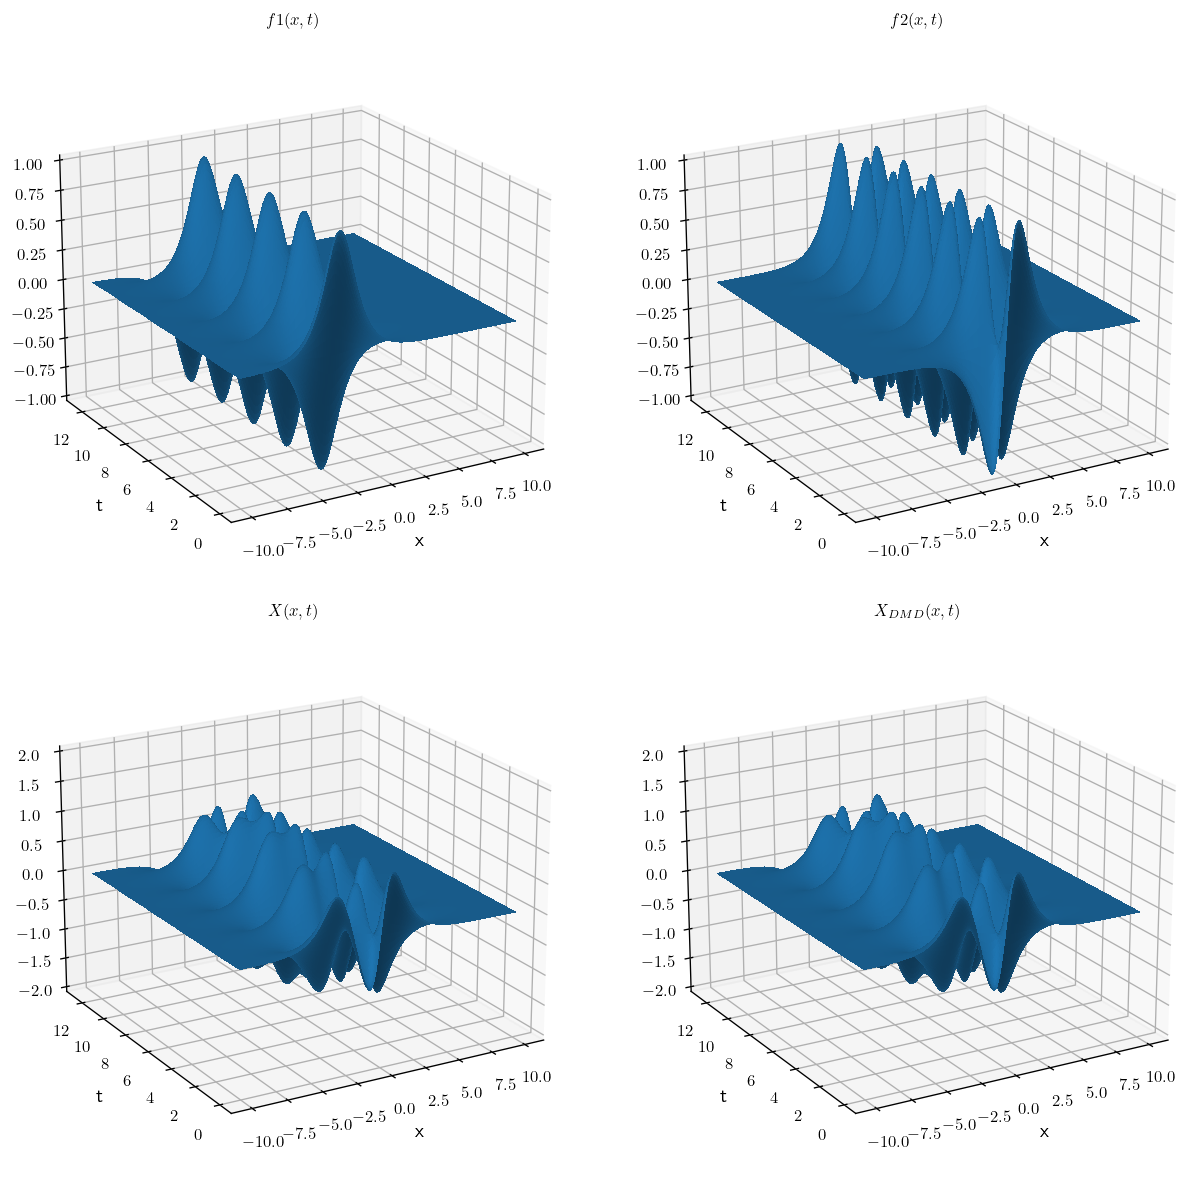

In [89]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(11,10))
ax = []
for j in range(4):
    axis = fig.add_subplot(2, 2, j+1, projection='3d')
    axis.set(xlabel='x',ylabel='t')
    axis.view_init(20,-120)
    ax.append(axis)
    
ax[0].plot_surface(Xgrid, Tgrid, np.real(f1), rstride=1, cstride=1, linewidth=0, antialiased=False, shade=True)
ax[0].set(title='$f1(x,t)$')
ax[0].set_zlim(-1, 1)
ax[1].plot_surface(Xgrid, Tgrid, np.real(f2), rstride=1, cstride=1, linewidth=0, antialiased=False, shade=True)
ax[1].set(title='$f2(x,t)$')
ax[1].set_zlim(-1, 1)
ax[2].plot_surface(Xgrid, Tgrid, np.real(X.T), rstride=1, cstride=1, linewidth=0, antialiased=False, shade=True)
ax[2].set(title='$X(x,t)$')
ax[2].set_zlim(-2, 2)
ax[3].plot_surface(Xgrid, Tgrid, np.real(Xdmd.T), rstride=1, cstride=1, linewidth=0, antialiased=False, shade=True)
ax[3].set(title='$X_{DMD}(x,t)$')
ax[3].set_zlim(-2, 2)
plt.tight_layout()